In [19]:
import numpy
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.sql.functions import col
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, GBTClassifier
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

## 读取数据

In [20]:
# 初始化Spark会话
spark = SparkSession.builder.appName("Classifier").getOrCreate()

# 读取CSV文件
train_data = spark.read.csv("file:///home/Lsc/train_data/part-00000.csv", header=True, inferSchema=True)
test_data = spark.read.csv("file:///home/Lsc/test_data/part-00000.csv", header=True, inferSchema=True)
# 选择相关特征和目标列
feature_columns = [
    "CNT_CHILDREN_value", "REGION_POPULATION_RELATIVE_value", "FLAG_EMP_PHONE_value",
    "FLAG_WORK_PHONE_value", "FLAG_CONT_MOBILE_value", "FLAG_PHONE_value", "FLAG_EMAIL_value",
    "REGION_RATING_CLIENT_value", "REGION_RATING_CLIENT_W_CITY_value", "REG_REGION_NOT_WORK_REGION_value",
    "LIVE_REGION_NOT_WORK_REGION_value", "REG_CITY_NOT_LIVE_CITY_value", "REG_CITY_NOT_WORK_CITY_value",
    "LIVE_CITY_NOT_WORK_CITY_value", "HOUR_APPR_PROCESS_START_value", "WEEKDAY_INDEX_value"
]

In [21]:
# 特征向量
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
train_data = assembler.transform(train_data)
test_data = assembler.transform(test_data)

## LogisticRegression

In [5]:
# 初始化模型
lr = LogisticRegression(featuresCol="features", labelCol="TARGET")

# 训练模型
lr_model = lr.fit(train_data)

# 测试集上进行预测
lr_predictions = lr_model.transform(test_data)

In [6]:
# 初始化评估器
evaluator = MulticlassClassificationEvaluator(labelCol="TARGET", predictionCol="prediction")

# 评估模型的准确率
lr_accuracy = evaluator.evaluate(lr_predictions, {evaluator.metricName: "accuracy"})
print(f"Logistic Regression Accuracy: {lr_accuracy}")

# 评估模型的F1分数
lr_f1 = evaluator.evaluate(lr_predictions, {evaluator.metricName: "f1"})
print(f"Logistic Regression F1 Score: {lr_f1}")

# 评估模型的召回率
lr_recall = evaluator.evaluate(lr_predictions, {evaluator.metricName: "weightedRecall"})
print(f"Logistic Regression Recall: {lr_recall}")

Logistic Regression Accuracy: 0.9228509648729142
Logistic Regression F1 Score: 0.8858241423023199
Logistic Regression Recall: 0.9228509648729142


## Random Forest

In [12]:
# 初始化模型
rf = RandomForestClassifier(featuresCol="features", labelCol="TARGET")

# 训练模型
rf_model = rf.fit(train_data)

# 测试集上进行预测
rf_predictions = rf_model.transform(test_data)

In [14]:
# 初始化评估器
evaluator = MulticlassClassificationEvaluator(labelCol="TARGET", predictionCol="prediction")

# 评估模型的准确率
rf_accuracy = evaluator.evaluate(rf_predictions, {evaluator.metricName: "accuracy"})
print(f"Random Forest Accuracy: {rf_accuracy}")

# 评估模型的F1分数
rf_f1 = evaluator.evaluate(rf_predictions, {evaluator.metricName: "f1"})
print(f"Random Forest F1 Score: {rf_f1}")

# 评估模型的召回率
rf_recall = evaluator.evaluate(rf_predictions, {evaluator.metricName: "weightedRecall"})
print(f"Random Forest Recall: {rf_recall}")

Random Forest Accuracy: 0.9228509648729142
Random Forest F1 Score: 0.8858241423023199
Random Forest Recall: 0.9228509648729142


## GBT Classifier

In [16]:
# 初始化模型
gbt = GBTClassifier(featuresCol="features", labelCol="TARGET")

# 训练模型
gbt_model = gbt.fit(train_data)

# 测试集上进行预测
gbt_predictions = gbt_model.transform(test_data)

In [17]:
# 初始化评估器
evaluator = MulticlassClassificationEvaluator(labelCol="TARGET", predictionCol="prediction")

# 评估模型的准确率
gbt_accuracy = evaluator.evaluate(gbt_predictions, {evaluator.metricName: "accuracy"})
print(f"GBT Classifier Accuracy: {gbt_accuracy}")

# 评估模型的F1分数
gbt_f1 = evaluator.evaluate(gbt_predictions, {evaluator.metricName: "f1"})
print(f"GBT Classifier F1 Score: {gbt_f1}")

# 评估模型的召回率
gbt_recall = evaluator.evaluate(gbt_predictions, {evaluator.metricName: "weightedRecall"})
print(f"GBT Classifier Recall: {gbt_recall}")

GBT Classifier Accuracy: 0.9228101668638571
GBT Classifier F1 Score: 0.8858037757038169
GBT Classifier Recall: 0.9228101668638571


## 多层感知机（MLP）

In [22]:
# 定义MLP模型
layers = [len(feature_columns), 5, 4, 2]  # 层结构：输入层、两个隐藏层、输出层
mlp = MultilayerPerceptronClassifier(layers=layers, featuresCol="features", labelCol="TARGET", seed=1234)

# 训练模型
mlp_model = mlp.fit(train_data)

# 测试集上进行预测
mlp_predictions = mlp_model.transform(test_data)

In [23]:
# 初始化评估器
evaluator = MulticlassClassificationEvaluator(labelCol="TARGET", predictionCol="prediction")

# 评估模型的准确率
mlp_accuracy = evaluator.evaluate(mlp_predictions, {evaluator.metricName: "accuracy"})
print(f"MLP Accuracy: {mlp_accuracy}")

# 评估模型的F1分数
mlp_f1 = evaluator.evaluate(mlp_predictions, {evaluator.metricName: "f1"})
print(f"MLP F1 Score: {mlp_f1}")

# 评估模型的召回率
mlp_recall = evaluator.evaluate(mlp_predictions, {evaluator.metricName: "weightedRecall"})
print(f"MLP Recall: {mlp_recall}")

MLP Accuracy: 0.9228509648729142
MLP F1 Score: 0.8858241423023199
MLP Recall: 0.9228509648729142


## 关闭Spark会话

In [18]:
# 关闭Spark会话
spark.stop()

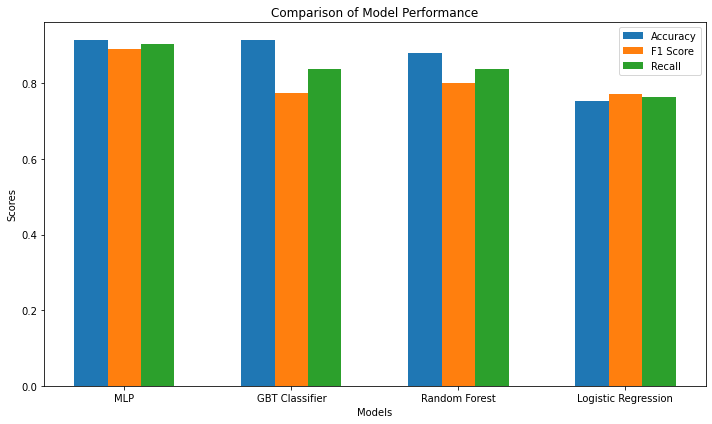

In [4]:
import matplotlib.pyplot as plt

# Data
models = ['MLP', 'GBT Classifier', 'Random Forest', 'Logistic Regression']

# Plotting
x = range(len(models))
plt.figure(figsize=(10, 6))

plt.bar([a - 0.2 for a in x], accuracy, width=0.2, label='Accuracy', align='center')
plt.bar(x, f1_score, width=0.2, label='F1 Score', align='center')
plt.bar([a + 0.2 for a in x], recall, width=0.2, label='Recall', align='center')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Model Performance')
plt.xticks(x, models)
plt.legend()

plt.tight_layout()
plt.show()
